In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/usp-pj01/train_Iris.csv
/kaggle/input/usp-pj01/test_Iris.csv


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
# read the data set
train = pd.read_csv("/kaggle/input/usp-pj01/train_Iris.csv")
test = pd.read_csv("/kaggle/input/usp-pj01/test_Iris.csv")

In [4]:
df = pd.concat([train,test])

In [5]:
df.sample(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
96,70,5.6,2.5,3.9,1.1,Iris-versicolor
93,26,5.0,3.0,1.6,0.2,Iris-setosa
70,150,5.9,3.0,5.1,1.8,Iris-virginica
2,130,7.2,3.0,5.8,1.6,Iris-virginica


In [6]:
df.shape

(150, 6)

In [7]:
df.rename(columns={'SepalLengthCm':'sepallength','SepalWidthCm':'sepalwidth','PetalLengthCm':'petallength','PetalWidthCm':'petalwidth','Species':'species'},inplace=True)

In [8]:
# df

# Missing value

In [9]:
df.isna().sum()

Id              0
sepallength     0
sepalwidth      0
petallength     0
petalwidth      0
species        30
dtype: int64

In [10]:
train.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
test.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [12]:
test.shape

(30, 5)

In [13]:
train.rename(columns={'SepalLengthCm':'sepallength','SepalWidthCm':'sepalwidth','PetalLengthCm':'petallength','PetalWidthCm':'petalwidth','Species':'species'},inplace=True)

In [14]:
train.sample(2)

,Id,sepallength,sepalwidth,petallength,petalwidth,species
38,83,5.8,2.7,3.9,1.2,Iris-versicolor
92,149,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
train.describe()

,Id,sepallength,sepalwidth,petallength,petalwidth
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,77.141667,5.870000,3.068333,3.781667,1.217500
std,44.383034,0.841527,0.431527,1.784762,0.776294
min,1.000000,4.300000,2.200000,1.000000,0.100000
25%,37.750000,5.100000,2.800000,1.600000,0.300000
50%,78.500000,5.800000,3.000000,4.350000,1.300000
75%,116.250000,6.500000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# EDA

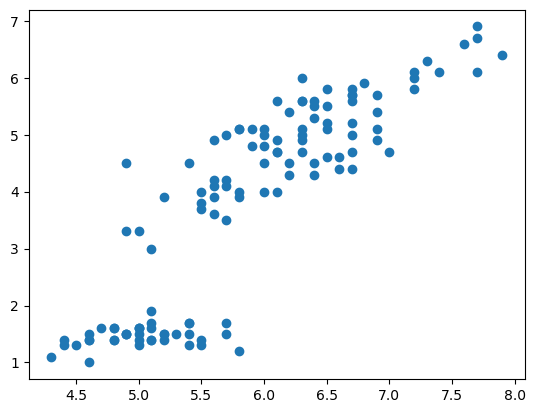

In [16]:
plt.scatter(train['sepallength'],train['petallength'])
plt.show()

# Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [17]:
X1 = train.iloc[ : , [1,2] ]
X3 = train.iloc[:,[1,3]]
X2 = train.iloc[:,[3,4]]
X4 = train.iloc[:,[2,4]]
X1 # X1 is a dataframe

,sepallength,sepalwidth
0,6.6,2.9
1,6.2,2.9
2,7.2,3.0
3,5.8,2.8
4,6.3,2.5
...,...,...
115,5.7,2.5
116,5.6,2.9
117,5.7,4.4
118,7.2,3.2


In [18]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [19]:
hopkins(X1) # Sepallength and sepalwidth 

0.6431008795613811

In [20]:
hopkins(train.iloc[:,[1,3]]) # sepallength and petallength

0.8282469789558629

In [21]:
hopkins(train.iloc[:,[3,4]]) # petallength and petalwidth 

0.8714357108662248

In [22]:
hopkins(train.iloc[:,[2,4]]) # sepalwidth and petalwidth

0.8232701745368908

In [23]:
l = [] # Sepallength and sepalwidth 
l2 = [] # sepallength and petallength
l3 = []  # petallength and petalwidth 
l4 = [] # sepalwidth and petalwidth

for i in range(100):
    l.append(hopkins(X1))
    l2.append(hopkins(train.iloc[:,[1,3]]))
    l3.append(hopkins(train.iloc[:,[3,4]]))
    l4.append(hopkins(train.iloc[:,[2,4]]))



In [24]:
print(sum(l)/len(l))
print(sum(l2)/len(l2))
print(sum(l3)/len(l3))
print(sum(l4)/len(l4))

0.7611896585237194
0.854742900306555
0.8964581883715326
0.8349241303415194


# Elbow Curve

In [25]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

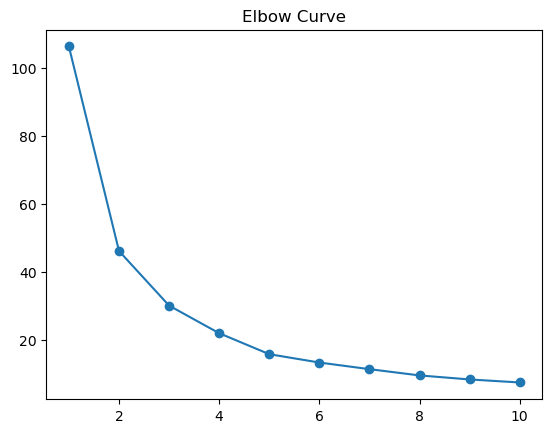

In [26]:
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Curve")
plt.show()

herefore, we understand that the right number of clusters is 3.

# Silhoutte Analysis

In [27]:
# Silhoutte Analysis
from sklearn.metrics import silhouette_score

sse = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(X1)
    sse.append([k, silhouette_score(X1, kmeans.labels_)])

In [28]:
sse

[[2, 0.47343095538934676],
 [3, 0.44379843569256183],
 [4, 0.4345852572190168],
 [5, 0.4371395430006224],
 [6, 0.41530781920836674],
 [7, 0.43717480579511186],
 [8, 0.41039667548216385],
 [9, 0.4150671680377559],
 [10, 0.4080224017428648],
 [11, 0.39401508540639596],
 [12, 0.3971775052003635],
 [13, 0.4123551425051351],
 [14, 0.4047175681184836]]

In [29]:
sse_ = pd.DataFrame(sse)
sse_

,0,1
0,2,0.473431
1,3,0.443798
2,4,0.434585
3,5,0.437140
4,6,0.415308
5,7,0.437175
6,8,0.410397
7,9,0.415067
8,10,0.408022
9,11,0.394015


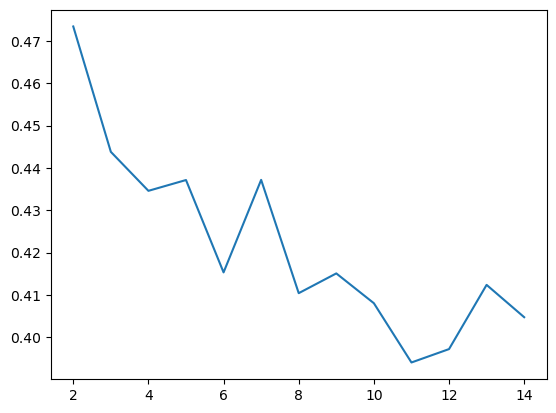

In [30]:
plt.plot(sse_[0], sse_[1])
plt.show()

In [31]:
sse1 = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(X2)
    sse1.append([k, silhouette_score(X1, kmeans.labels_)])

In [32]:
sse2 = pd.DataFrame(sse)

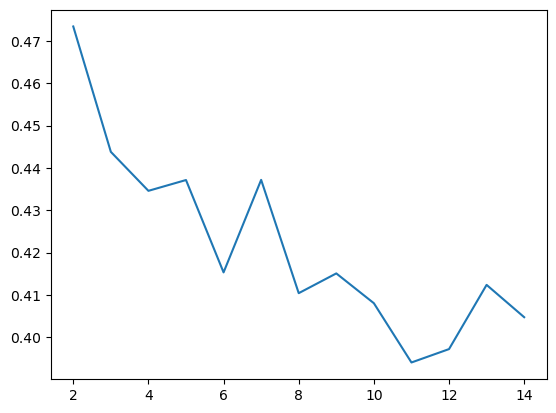

In [33]:
plt.plot(sse2[0], sse2[1])
plt.show()

In [34]:
# Create Clusters. Assume with no. of clusters = 2
kmeans = KMeans(n_clusters=3)  
kmeans.fit(X1)  

# see what centroid values the algorithm generated for the final clusters 
print(kmeans.cluster_centers_)

[[6.79285714 3.07619048]
 [5.03333333 3.45897436]
 [5.71282051 2.66923077]]


In [35]:
kmeans2 = KMeans(n_clusters=3)  
kmeans2.fit(X2)  
print(kmeans2.cluster_centers_)

[[4.20540541 1.33243243]
 [1.4675     0.2475    ]
 [5.56976744 2.02093023]]


In [36]:
X1['labels'] = kmeans.labels_
X1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sepallength,sepalwidth,labels
0,6.6,2.9,0
1,6.2,2.9,2
2,7.2,3.0,0
3,5.8,2.8,2
4,6.3,2.5,2


In [37]:
X1['labels'] = kmeans.labels_
X1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sepallength,sepalwidth,labels
0,6.6,2.9,0
1,6.2,2.9,2
2,7.2,3.0,0
3,5.8,2.8,2
4,6.3,2.5,2


In [38]:
X1.labels.value_counts()

0    42
2    39
1    39
Name: labels, dtype: int64

In [39]:
train['cluster'] = kmeans.labels_
train.head()

,Id,sepallength,sepalwidth,petallength,petalwidth,species,cluster
0,59,6.6,2.9,4.6,1.3,Iris-versicolor,0
1,98,6.2,2.9,4.3,1.3,Iris-versicolor,2
2,130,7.2,3.0,5.8,1.6,Iris-virginica,0
3,115,5.8,2.8,5.1,2.4,Iris-virginica,2
4,147,6.3,2.5,5.0,1.9,Iris-virginica,2


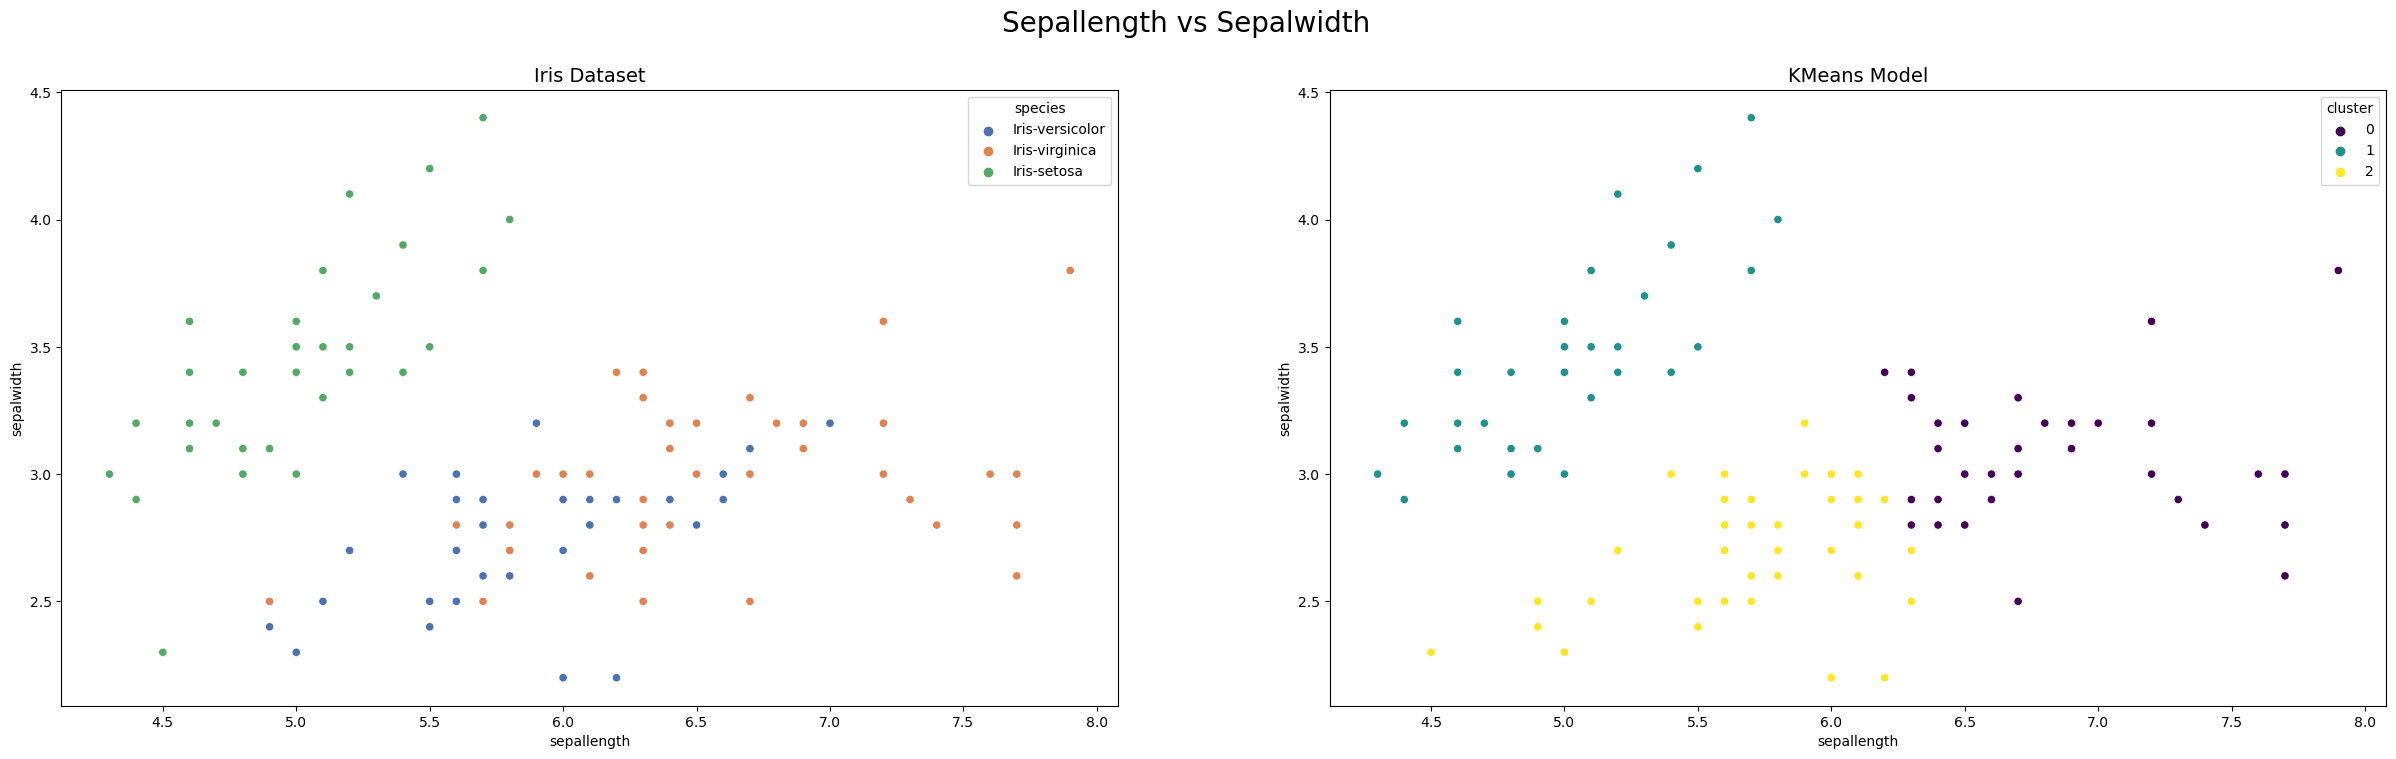

In [40]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
sns.scatterplot(x = 'sepallength', y = 'sepalwidth', data = train, hue = 'species', palette = 'deep')
plt.title('Iris Dataset', fontsize = 14)
plt.legend(title = 'species', bbox_to_anchor=(1, 1), loc = 0)

plt.subplot(1,2,2)
sns.scatterplot(x = 'sepallength', y = 'sepalwidth', data = train, hue = 'cluster', palette = 'viridis')
plt.title('KMeans Model', fontsize = 14)
plt.legend(title = 'cluster', bbox_to_anchor=(1, 1), loc = 0)

plt.suptitle("Sepallength vs Sepalwidth", fontsize = 20)
plt.show()

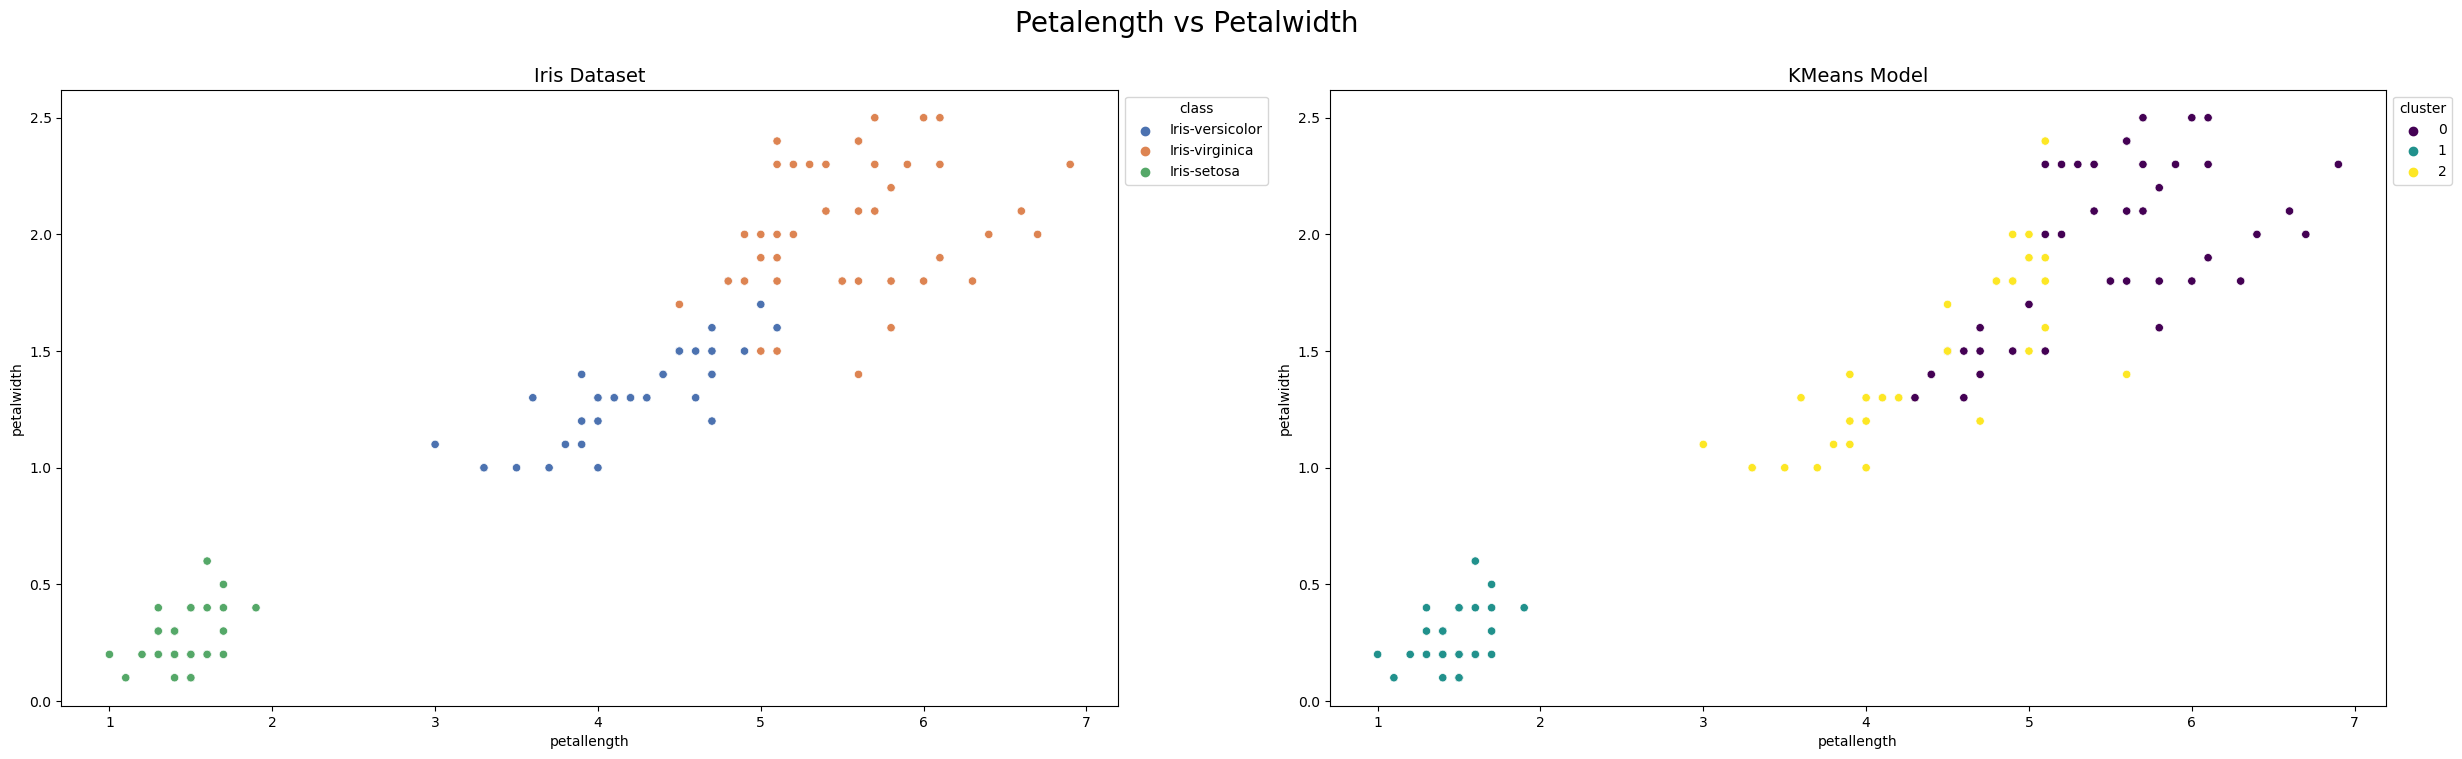

In [41]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
sns.scatterplot(x = 'petallength', y = 'petalwidth', data = train, hue = 'species', palette = 'deep')
plt.title('Iris Dataset', fontsize = 14)
plt.legend(title = 'class', bbox_to_anchor=(1, 1))

plt.subplot(1,2,2)
sns.scatterplot(x = 'petallength', y = 'petalwidth', data = train, hue = 'cluster', palette = 'viridis')
plt.title('KMeans Model', fontsize = 14)
plt.legend(title = 'cluster', bbox_to_anchor=(1, 1))

plt.suptitle("Petalength vs Petalwidth", fontsize = 20)
plt.show()

In [42]:
train.drop(columns=['cluster'], inplace=True)

In [43]:
train['cluster'] = kmeans2.labels_
train.head()

,Id,sepallength,sepalwidth,petallength,petalwidth,species,cluster
0,59,6.6,2.9,4.6,1.3,Iris-versicolor,0
1,98,6.2,2.9,4.3,1.3,Iris-versicolor,0
2,130,7.2,3.0,5.8,1.6,Iris-virginica,2
3,115,5.8,2.8,5.1,2.4,Iris-virginica,2
4,147,6.3,2.5,5.0,1.9,Iris-virginica,2


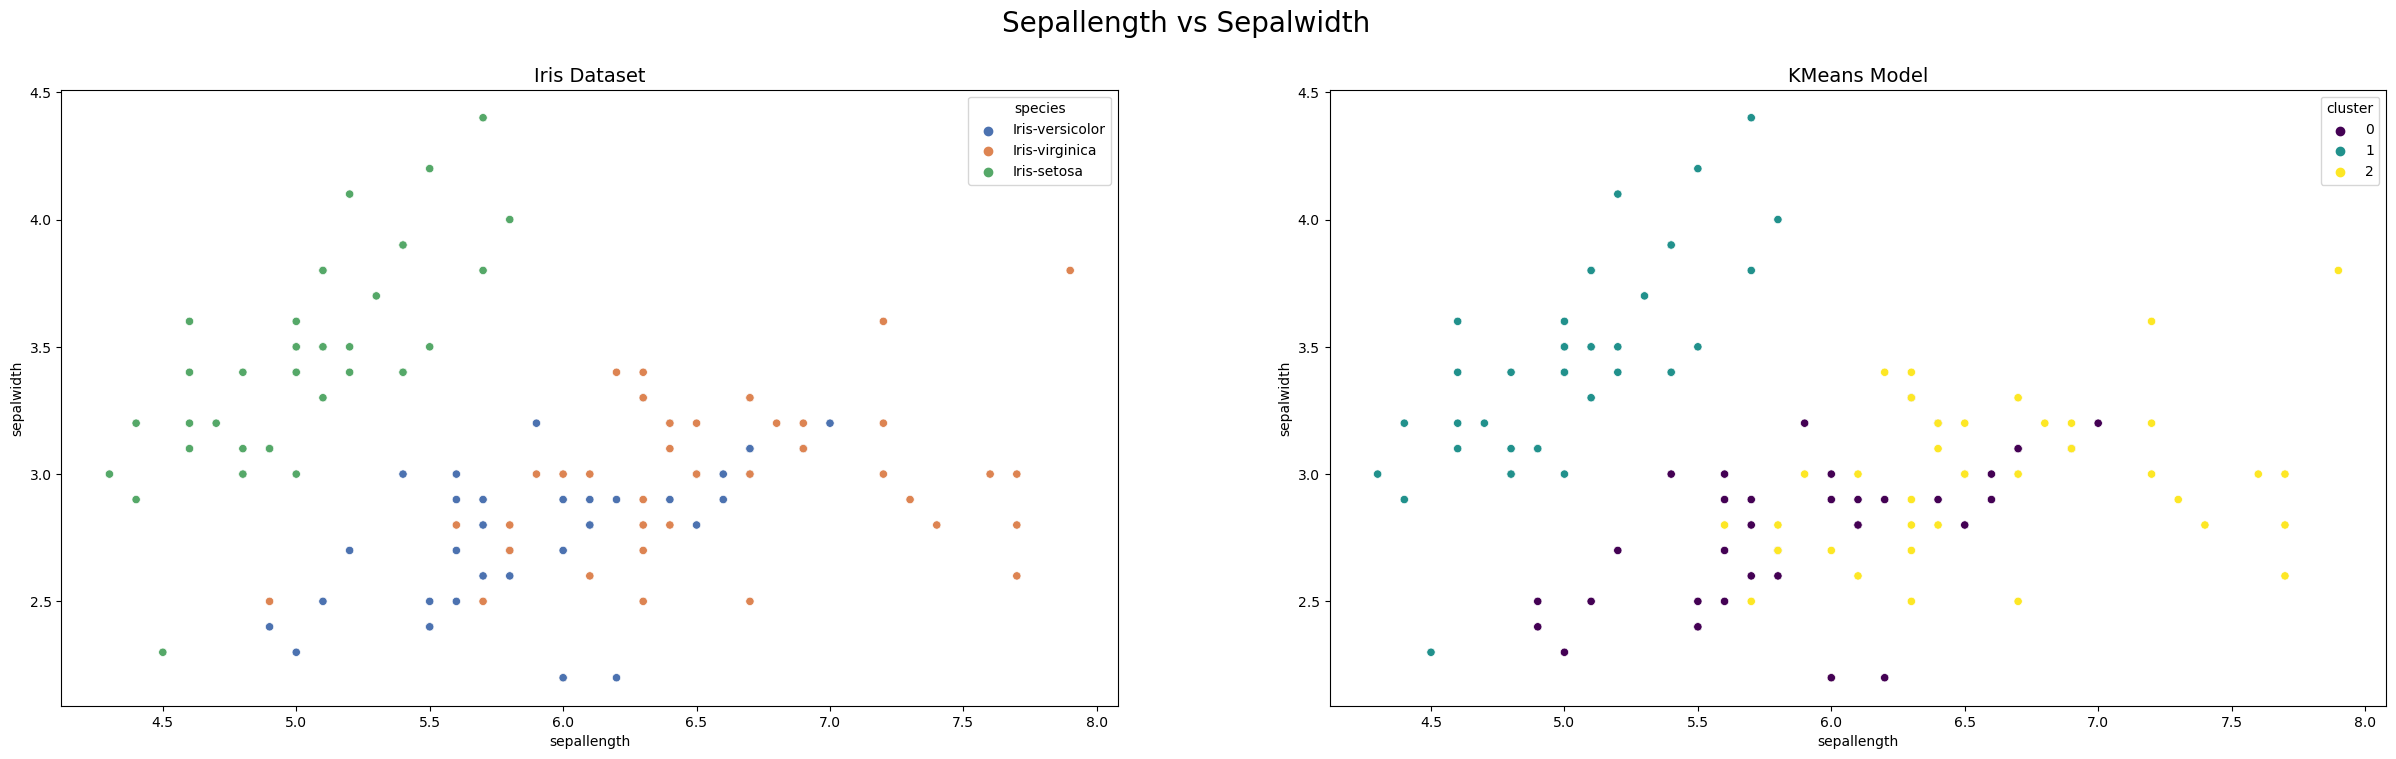

In [44]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
sns.scatterplot(x = 'sepallength', y = 'sepalwidth', data = train, hue = 'species', palette = 'deep')
plt.title('Iris Dataset', fontsize = 14)
plt.legend(title = 'species', bbox_to_anchor=(1, 1), loc = 0)

plt.subplot(1,2,2)
sns.scatterplot(x = 'sepallength', y = 'sepalwidth', data = train, hue = 'cluster', palette = 'viridis')
plt.title('KMeans Model', fontsize = 14)
plt.legend(title = 'cluster', bbox_to_anchor=(1, 1), loc = 0)

plt.suptitle("Sepallength vs Sepalwidth", fontsize = 20)
plt.show()

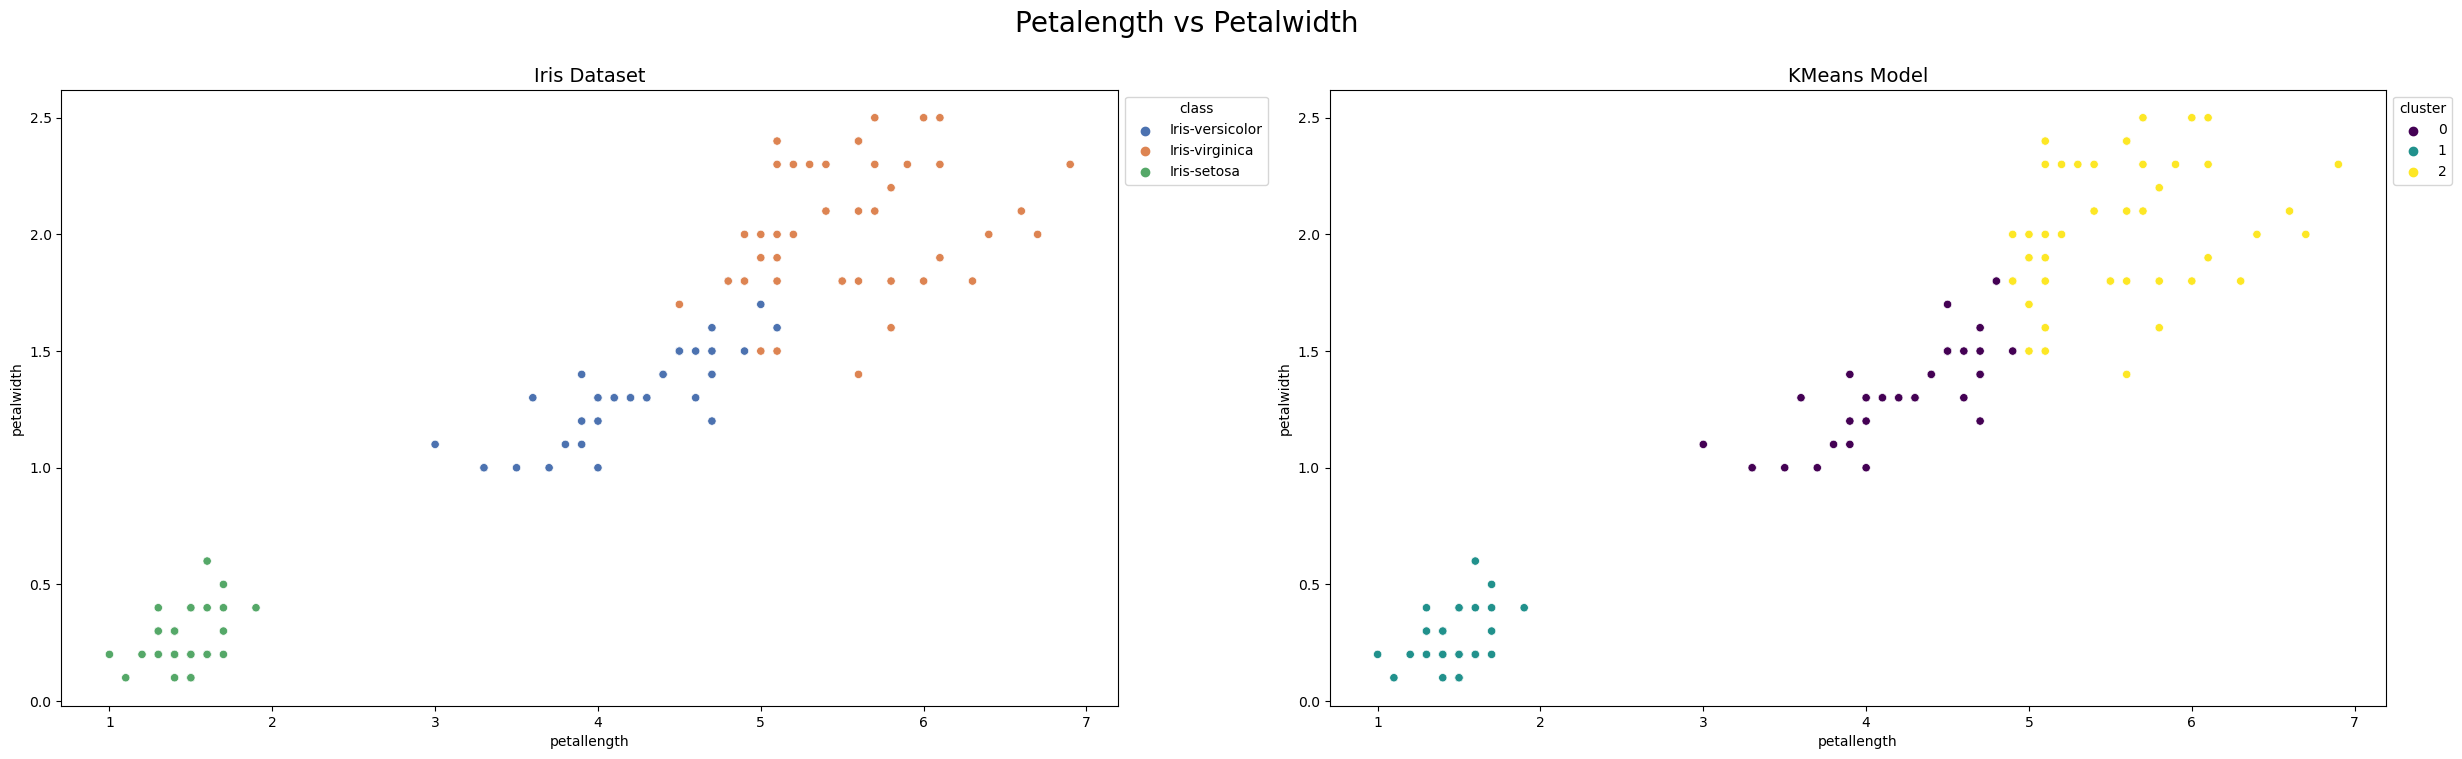

In [45]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
sns.scatterplot(x = 'petallength', y = 'petalwidth', data = train, hue = 'species', palette = 'deep')
plt.title('Iris Dataset', fontsize = 14)
plt.legend(title = 'class', bbox_to_anchor=(1, 1))

plt.subplot(1,2,2)
sns.scatterplot(x = 'petallength', y = 'petalwidth', data = train, hue = 'cluster', palette = 'viridis')
plt.title('KMeans Model', fontsize = 14)
plt.legend(title = 'cluster', bbox_to_anchor=(1, 1))

plt.suptitle("Petalength vs Petalwidth", fontsize = 20)
plt.show()